# Traveling Salesman Problem via Genetic algorithms

```
Author: Francesco Andreuzzi
Degree course: Data Science and Scientific Computing
Final project for the course "Computational Physics Laboratory" (2022/2023)
```

## The problem

The Traveling Salesman Problem (TSP) is a well known problem in Computer Science. It consists in finding the optimal (i.e. cheapest) tour which visits all cities in the instance, given a matrix of costs to travel from one to another:
$$
\normalsize
\begin{align*}
\text{Minimize}& \qquad \sum_{i=1}^N \sum_{j=1}^N x_{ij} d_{ij} \qquad \text{with } d_{ij} = \text{ cost for traveling } i \to j\\
\text{with}& \qquad \sum_{j=1}^N x_{ij} = 1 \qquad i = 1, \dots N \quad (\text{Exactly one incoming})\\
& \qquad \sum_{i=1}^N x_{ij} = 1 \qquad j = 1 \dots N \quad (\text{Exactly one outgoing})
\end{align*}
$$

A candidate solution is an ordered list of cities which describes a full tour. Exact algorithms are unfeasible for non-trivial instances [1].

## Genetic algorithms overview

Genetic algorithms (GA) are randomized approximation algorithms which iteratively optimize a set of viable solutions.

### Chromosomes

Chromosomes are potential solution to the problem, encoded in a way which can be easily manipulated during the steps of the optimization loop (crossover, fitness, mutation).

**Example**

The following chromosomes represents the solution $1 \to 6 \to 9 \to 4 \to 2 \to 3 \to 7 \to 6 \to 5 \to 8$ to TSP:

$$
\begin{bmatrix}
1 & 6 & 9 & 4 & 2 & 3 & 7 & 6 & 5 & 8
\end{bmatrix}
$$


### Fitness function

The *fitness* function maps chromosome into a real number which describes its "goodness". Chromosomes can be compared with each other to check which one is the best performer in the poupulation. For TSP, the fitness is the cost of the path described by the chromosome.

### Crossover

Optimization happens by a peculiar process called *crossover*, which consists in merging two parent solutions into a new one, hopefully reatining the best traits of the ancestors. Many *crossover operators* exist for the TSP problem, some of them are fully deterministic (e.g. `CX`, `CX2`), while others are based on a stochastic component (e.g. `OX`, `PMX`).

### Mutation

In addition to crossover, to further mimic natural biological evolution, GAs take a *mutation* probability into account to randomly modify a subset of the population. This often provides solutions not easily achievable by means of crossover, and is critical to fully explore the solution manifold. Due to their intrinsic stochastic definition, mutation operator are always randomized procedures which operate on a single chromosome.

### Pseudocode

The following pseudocode summarizes the operations needed to implement genetic optimization, and it's implemented in Python in `tsp-genetic-py/evolve.py`:
```
1. Initialize population randomly
2. Compute fitness
3. for G (generations)
    1. Select pairs for crossover
    2. Perform crossover
    3. Select chromosomes to be mutated
    4. Mutate selected chromosomes
    5. Replace old generation with new generation
    6. Update fitness
```

## Structure of the project

We briefly describe the structure of the [GitHub repository](https://github.com/fandreuz/tsp-genetic-algorithms) for the project.

### Languages

The problem was tackled using Python and Fortran 90, leveraging [f2py](https://numpy.org/doc/stable/f2py/index.html) to link the two languages.

**Python**:
- High level genetic optimization framework
- Loading problem from XML (TSPLIB)
- Data collection
- Data analysis
- User interface (command line & Jupyter notebook)
- Automated tests

**Fortran 90**:
- Crossover operators
- Mutation operators
- Fitness function

### Directories

```diff
$ tree -I 'venv|__pycache__|*.mod' --dirsfirst
.
├── data
-   │   # Problem data in XML format
│   │   ...
├── data-loader
-   │   # Responsible for loading problem data from XML
│   ├── load.py
-   │   # Problem representation as a Python class
│   └── problem.py
├── run
-   │   # Argparse CLI + utilities (logging, text display)
│   ├── data_storage.py
│   ├── printer.py
│   ├── run.py
│   └── utils.py
├── tests
-   │   # Pytest testing for low-level Fortran routines
│   ├── crossover
│   │   ├── test_crossover.py
│   │   ├── test_cx2-original.py
│   │   ├── test_cx2.py
│   │   ├── test_cx.py
│   │   ├── test_ox.py
│   │   └── test_pmx.py
│   ├── mutation
│   │   ├── test_central_inverse.py
│   │   ├── test_mutation.py
│   │   ├── test_reverse_sequence.py
│   │   └── test_twors.py
│   ├── test_problem.py
│   └── test_utils.py
├── tsp-genetic-f90
-   │   # Fortran implementation of low-level operators
│   ├── crossover
│   │   ├── cx2.f90
│   │   ├── cx2-original.f90
│   │   ├── cx.f90
│   │   ├── ox.f90
│   │   └── pmx.f90
│   ├── mutation
│   │   ├── central_inverse.f90
│   │   ├── reverse_sequence.f90
│   │   └── twors.f90
│   ├── problem.f90
│   └── utils.f90
├── tsp-genetic-py
-   │   # Genetic framework implementation
│   ├── configuration.py
│   ├── crossover.py
│   ├── evolve.py
│   ├── idata_logger.py
│   └── mutation.py
├── LICENSE
├── Makefile
├── README.md
-   # We are here
├── tsp-genetic-algorithms.ipynb
-   # Fortran code compiled with f2py
└── tsp_genetic.cpython-39-x86_64-linux-gnu.so
```

## High level objects
We defined some high level objects to ease starting a genetic optimization run.

### `Problem`
TSP problems are taken from the [TSPLIB](http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/) repository. We represent them in Python with the [dataclass](https://docs.python.org/3/library/dataclasses.html) `Problem`, which contains the fields `name`, `cost_matrix` and `optimal_tour`.

In [1]:
import utils
from load import build_problem

build_problem("a280")

Problem(name='a280', cost_matrix=array([[20.        , 24.08318916, 32.984845  , ..., 43.26661531,
        34.40930107, 17.88854382],
       [20.        , 18.43908891, 34.17601498, ..., 36.22154055,
        28.        ,  8.94427191],
       [24.08318916, 18.43908891, 16.1245155 , ..., 19.6977156 ,
        10.77032961, 10.        ],
       ...,
       [43.26661531, 36.22154055, 19.6977156 , ..., 17.08800749,
         8.94427191, 29.12043956],
       [34.40930107, 28.        , 10.77032961, ..., 18.43908891,
         8.94427191, 20.39607805],
       [17.88854382,  8.94427191, 10.        , ..., 34.92849839,
        29.12043956, 20.39607805]]), optimal_tour=array([  1,   2, 242, 243, 244, 241, 240, 239, 238, 237, 236, 235, 234,
       233, 232, 231, 246, 245, 247, 250, 251, 230, 229, 228, 227, 226,
       225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213,
       212, 211, 210, 207, 206, 205, 204, 203, 202, 201, 198, 197, 196,
       195, 194, 193, 192, 191, 190, 189, 188, 187, 

### `Configuration`

We defined the dataclass `Configuration` to pack all needed configurations for a given genetic optimization run:

In [2]:
from configuration import Configuration
from dataclasses import fields

[field.name for field in fields(Configuration)]

['population_size',
 'elite_size',
 'n_generations',
 'mutation_operator',
 'mutation_probability',
 'mutation_function_degree',
 'mutation_function_adaptive',
 'mutation_function_oscillating_amplitude',
 'mutation_function_oscillating_cycles',
 'crossover_operator',
 'crossover_strategy',
 'crossover_retainment',
 'next_generation_policy',
 'print_every']

# Genetic optimization

In this report we're going to experiment with the following knobs:
- Crossover operators
- Crossover strategy
- Mutation operators
- Mutation probability evolution
    - Polinomial
    - Adaptive
    - Oscillatory
    - Adaptive + oscillatory
- Next generation policy & elitism

First of all we're going to define a common configuration for all the following runs:

In [3]:
from dataclasses import replace
from configuration import (
    Crossover,
    CrossoverStrategy,
    CrossoverRetainment,
    NextGenerationPolicy,
)
from mutation import Mutation
import numpy as np

base_config = Configuration(
    population_size=250,
    elite_size=0,
    n_generations=1000,
    crossover_operator=None,
    crossover_strategy=CrossoverStrategy.FITNESS_RANDOM_PAIRS,
    crossover_retainment=CrossoverRetainment.FIRST,
    next_generation_policy=NextGenerationPolicy.BEST,
    mutation_operator=Mutation.TWORS,
    mutation_probability=0.05,
    mutation_function_degree=0,
    mutation_function_adaptive=False,
    mutation_function_oscillating_amplitude=0.0,
    mutation_function_oscillating_cycles=0,
    print_every=100,
)

generations = base_config.print_every * np.arange(
    1, base_config.n_generations // base_config.print_every + 1
)
generations_full = np.arange(1, base_config.n_generations)

We also load two benchmark problems objects from TSPLIB, one comprising 76 nodes (`small`) and one comprising 280 nodes (`a280`):

In [4]:
problem_small = build_problem("eil76")
problem_big = build_problem("a280")

## Crossover operators

We implemented the following crossover operators:
- *Relative order preserving operators*
    - Order crossover (OX) [9]: the child receives a random cut sequence from `parent1`, and the rest is taken from `parent2` preserving relative order.
    - Partially mapped crossover (PMX) [8]: the child receives a random cut sequence from `parent1`, and the rest is taken exactly cell-by-cell from `parent2`.
- *Cyclic operators* (code more clear for description)
    - Cycle crossover (CX)
    - Cycle crossover -- 2nd version (CX2)

We define new configurations based on `base_config`:

In [5]:
ox_config = replace(base_config, crossover_operator=Crossover.OX)
pmx_config = replace(base_config, crossover_operator=Crossover.PMX)
cx_config = replace(base_config, crossover_operator=Crossover.CX)
cx2_config = replace(base_config, crossover_operator=Crossover.CX2)

config = tuple((ox_config, pmx_config, cx_config, cx2_config))
labels = tuple(("OX", "PMX", "CX", "CX2"))

We are now ready to run the genetic optimization:

In [6]:
from utils import run_optimizations, run_many_optimizations

data_small_1 = run_many_optimizations(problem_small, config)
data_big_1 = run_many_optimizations(problem_big, config)

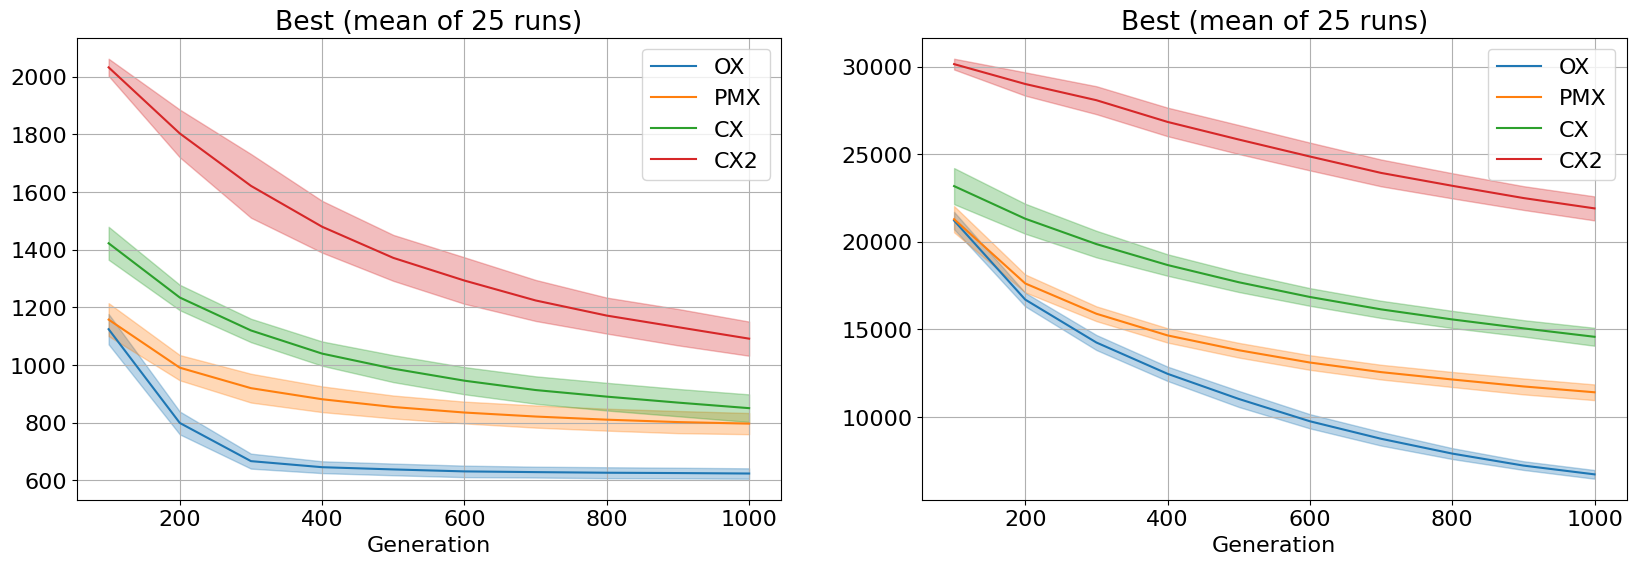

In [7]:
from utils import plot_big_and_small, get_N_simulations

plot_big_and_small(
    generations,
    data_small_1,
    data_big_1,
    labels,
    n_runs=get_N_simulations(),
    should_plot_std=True,
)

It's quite evident that operators which belong to the category *Relative-order-preserving-operators* achieve much better results. This finding is widely recognized in genetic algorithms literature ([2]) for path-based problems.

Also, the operator `OX` has in general a relatively small standard deviation, compared to the other operators. This is of course desirable, since it means better results which are closer to the mean in most runs.

## Crossover strategy

There are a few options among which we can choose to select the parents which will be used for the crossover phase. The options are listed in the enum `CrossoverStrategy`, and characterize the set from which the crossover pairs will be drawn:
- `ALL_IN_ORDER`: all chromosomes in the previous generation are part of the selection process. Pairs are **always** formed in order (according to the fitness), therefore the selection is not random;
- `ALL_RANDOM_PAIRS`: like `ALL_IN_ORDER`, but pairs are formed randomly;
- `RANDOM_PAIRS`: pairs are drawn randomly with replacement, therefore each parent could be selected 0, 1 or more times;
- `FITNESS_RANDOM_PAIRS`: like `RANDOM_PAIRS`, but each parent is extracted with a probability which depends on `1/fitness`.

In [35]:
ox_aio_config = replace(
    ox_config,
    crossover_strategy=CrossoverStrategy.ALL_IN_ORDER,
    crossover_retainment=CrossoverRetainment.ALL_CHILDREN,
)
ox_arp_config = replace(
    ox_config, crossover_strategy=CrossoverStrategy.ALL_RANDOM_PAIRS
)
ox_rp_config = replace(ox_config, crossover_strategy=CrossoverStrategy.RANDOM_PAIRS)

config = tuple((ox_config, ox_aio_config, ox_arp_config, ox_rp_config))
labels = tuple(
    map(
        str,
        (
            CrossoverStrategy.FITNESS_RANDOM_PAIRS,
            CrossoverStrategy.ALL_IN_ORDER,
            CrossoverStrategy.ALL_RANDOM_PAIRS,
            CrossoverStrategy.RANDOM_PAIRS,
        ),
    )
)

In [36]:
data_small_2 = run_many_optimizations(problem_small, config)
data_big_2 = run_many_optimizations(problem_big, config)

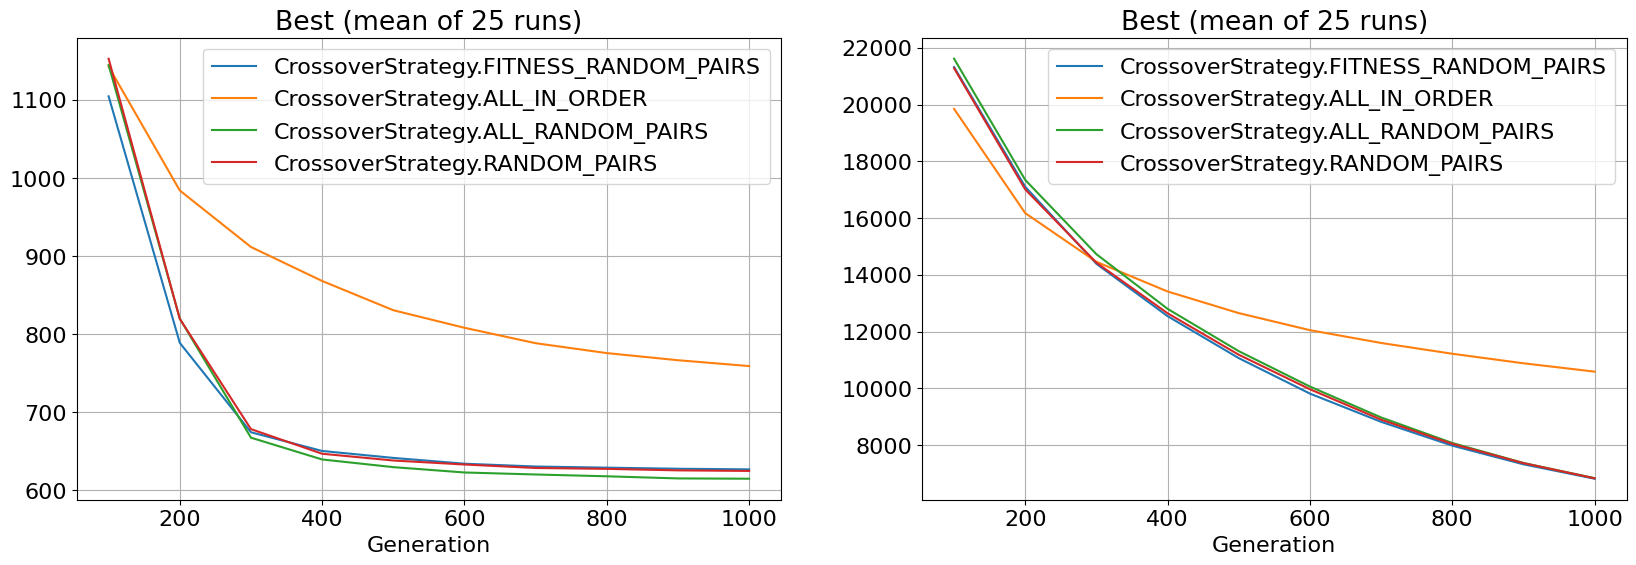

In [37]:
plot_big_and_small(
    generations, data_small_2, data_big_2, labels, n_runs=get_N_simulations()
)

From the two plots above it's quite clear that the one single worst strategy is to take all chromosomes and pairing them in consecutive pairs according to their fitness. This is quite interesting as this is the single non-stochastic strategy among the four we took into account.


## Mutation operators [5]
We now turn to the selection of an optimal mutation operator, among those which we implemented as part of the project:
- `Twors` (simple inversion): two randomly chosen points in the path are swapped.
- `Central inverse`: the path is subdivided in two segments based on the selection of a random point, the two segments are then reversed;
- `Reverse sequence`: a randomly chosen sequence in the chromosome is reversed

In [11]:
ox_no_mutation = replace(ox_config, mutation_probability=0.0)
ox_twors_config = ox_config
ox_ci_config = replace(ox_config, mutation_operator=Mutation.CENTRAL_INVERSE)
ox_rs_config = replace(ox_config, mutation_operator=Mutation.REVERSE_SEQUENCE)

config = tuple((ox_twors_config, ox_ci_config, ox_rs_config, ox_no_mutation))
labels = tuple(("Twors", "Central inverse", "Reverse sequence", "No mutation"))

In [12]:
data_small_3 = run_many_optimizations(problem_small, config)
data_big_3 = run_many_optimizations(problem_big, config)

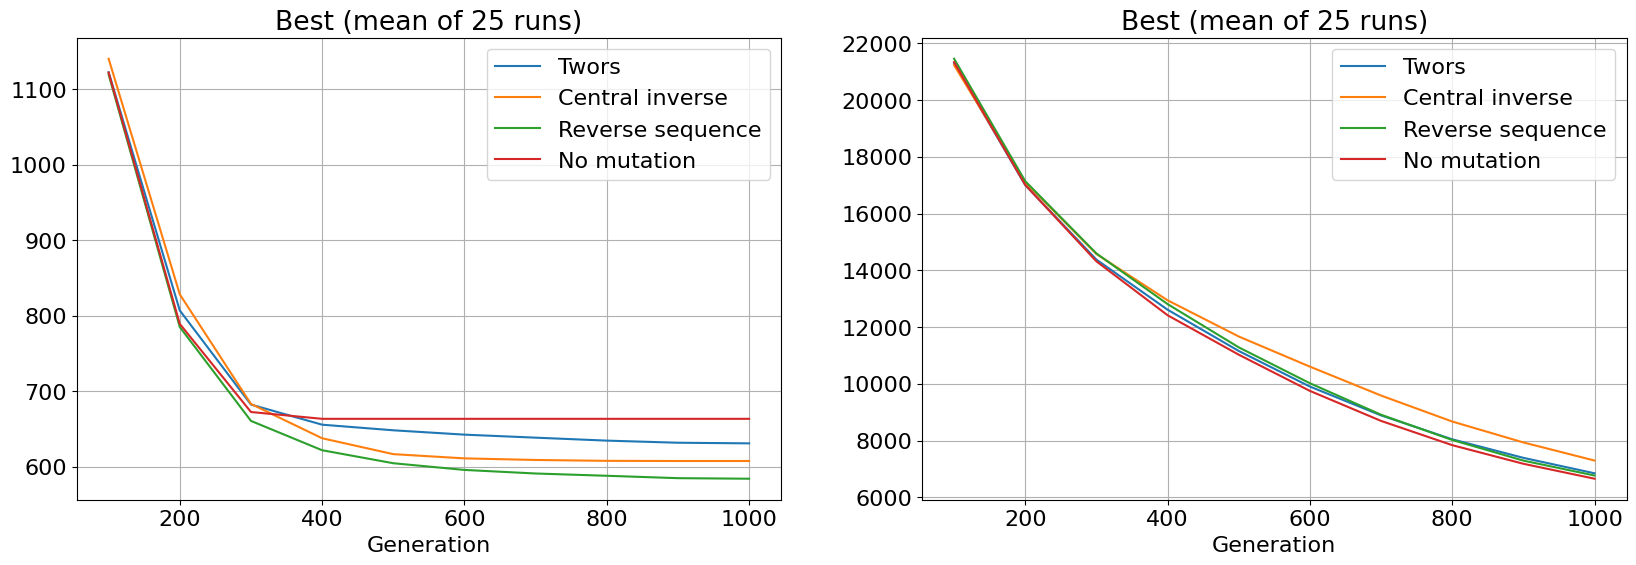

In [13]:
plot_big_and_small(
    generations, data_small_3, data_big_3, labels, n_runs=get_N_simulations()
)

It's quite interesting that disabling mutation provides a run which is on average follows the runs with mutation, but reaches an hard limit for small problems when crossover is not able to visit new locations in the solution manifold. The same behavior does not appear for the big problem (`a280`).

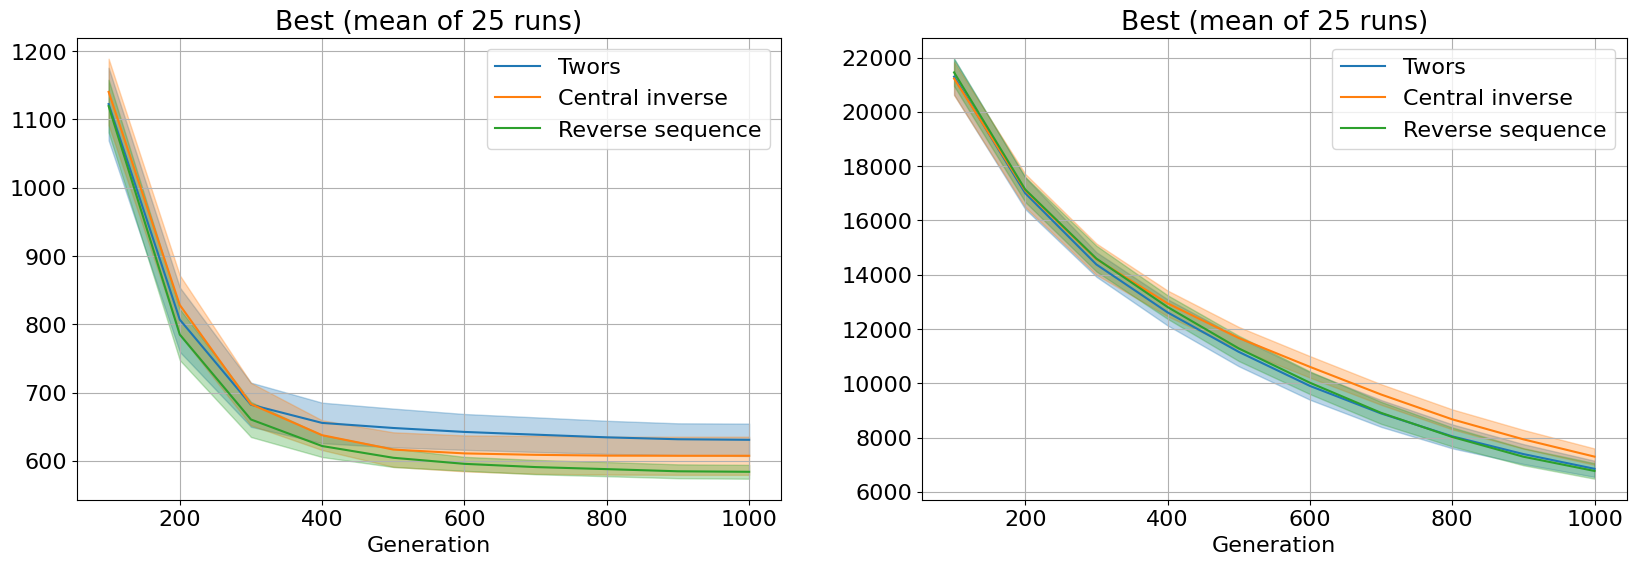

In [14]:
plot_big_and_small(
    generations,
    data_small_3[:-1],
    data_big_3[:-1],
    labels[:-1],
    n_runs=get_N_simulations(),
    should_plot_std=True,
)

Looking at the variance, the `Reverse sequence` mutation operator provides runs with smaller variance with respect to the other operators taken into account.

## Polynomial mutation probability

As noted in [6], it's desirable to increase the mutation probability as the generation index increases, since the population of chromosomes tends to stagnate towards repeated high-fitness individuals. For this reason, extending the work presented in [6], we implemented a flexible evolution policy for the mutation probability, i.e. the probability that a given chromosome is subject to a mutation after crossover happens. The policy is parametrized by an integer number $k$, which acts as the polynomial degree of the function which describes the evolution of the probability in time.

The mutation probability $m$ for the generation $g$ is computed as follows:
$$
\normalsize
m(g) = \frac{M}{G^k} g^k
$$

given the total number of generations $G$ and the target mutation probability $M$.

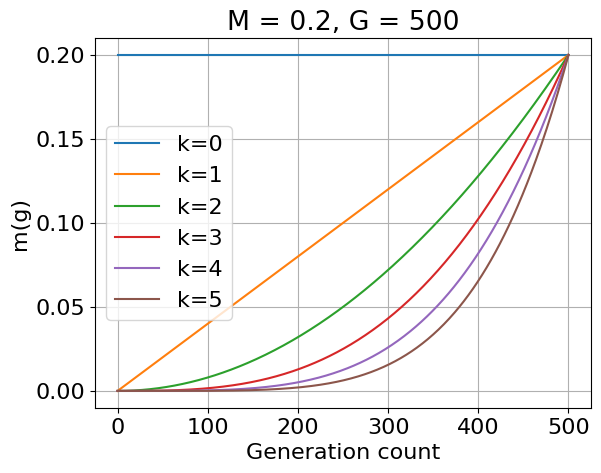

In [15]:
import matplotlib.pyplot as plt
from utils import setup_matplotlib

setup_matplotlib()

g = np.arange(501)
M = 0.2


def plot_evolution(k):
    plt.plot(g, M / g[-1] ** k * g**k, label=f"k={k}")


for i in range(6):
    plot_evolution(i)

plt.legend()

plt.xlabel("Generation count")
plt.ylabel("m(g)")
plt.title(f"M = {M}, G = {g[-1]}")
plt.grid()

plt.show()

We now verify if and how varying the mutation rate makes any difference in the best individual produced by the optimization. We're going to use again `OX` crossover and `Reverse sequence` mutation operator as they were the best candidate of previous experiments.

In [16]:
ox1_config = replace(ox_rs_config, mutation_function_degree=1)
ox2_config = replace(ox_rs_config, mutation_function_degree=3)
ox3_config = replace(ox_rs_config, mutation_function_degree=6)

config = tuple((ox_rs_config, ox1_config, ox2_config, ox3_config))
labels = tuple(("Constant", "k=1", "k=3", "k=6"))

In [17]:
data_small_4 = run_many_optimizations(problem_small, config)
data_big_4 = run_many_optimizations(problem_big, config)

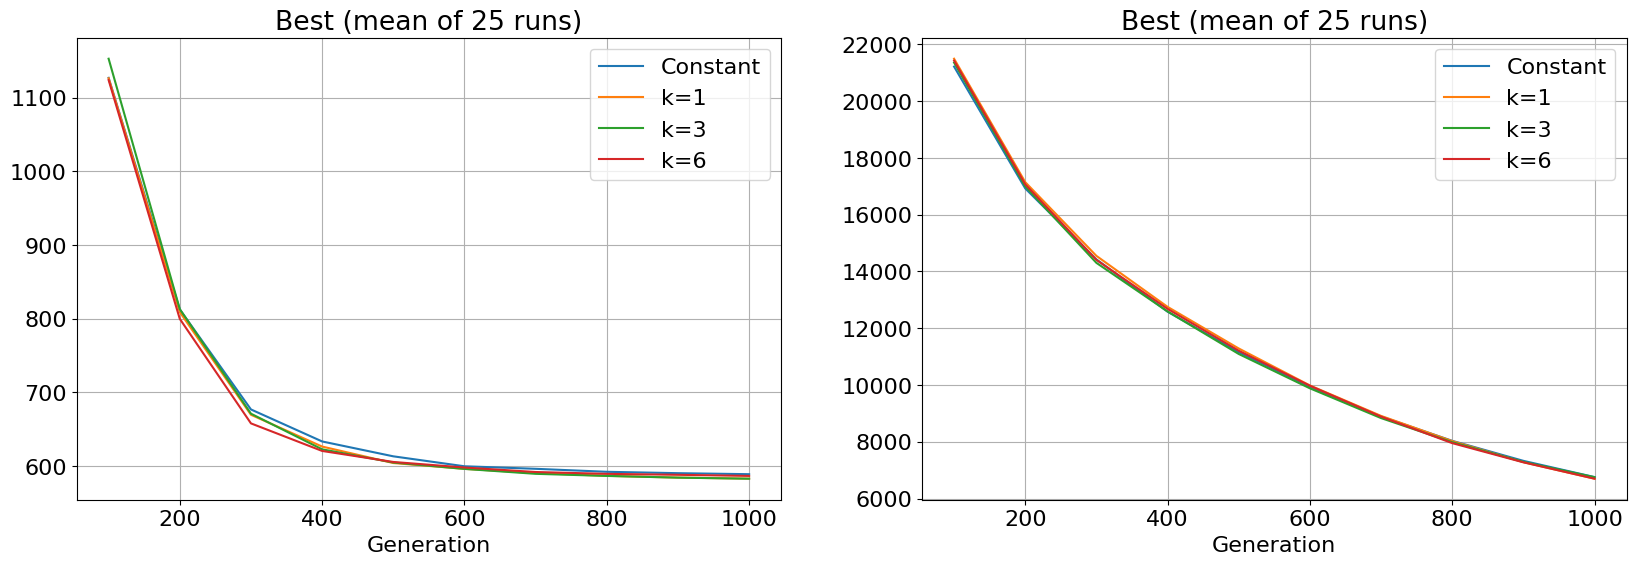

In [18]:
plot_big_and_small(
    generations, data_small_4, data_big_4, labels, n_runs=get_N_simulations()
)

From the plot above, it looks like the polynomial approach did not bring any meaniningful improvement to the results.

## Next generation policy

The replacement of the old generation with the new one can be performed in two ways, which we collected in the enum `NextGenerationPolicy`:
- `REPLACE_ALL`: Replace the whole old generation with the new generation;
- `BEST`: Retain the first `N` best individuals according to fitness among old and new population.

Moreover, for the policy `REPLACE_ALL` we could apply *elitism* [2]: a small percentage of top performing chromosomes from the **old generation** is retained irrespective of their rank. 

In [19]:
ox_ra_el0_config = replace(
    ox_ci_config, next_generation_policy=NextGenerationPolicy.REPLACE_ALL, elite_size=0
)
ox_ra_el01_config = replace(ox_ra_el0_config, elite_size=0.1)
ox_ra_el03_config = replace(ox_ra_el0_config, elite_size=0.3)
ox_best_config = replace(
    ox_ra_el0_config, next_generation_policy=NextGenerationPolicy.BEST
)

config = tuple((ox_ra_el0_config, ox_ra_el01_config, ox_ra_el03_config, ox_best_config))
labels = tuple(
    (
        "REPLACE_ALL - Elitism=0%",
        "REPLACE_ALL - Elitism=10%",
        "REPLACE_ALL - Elitism=30%",
        "BEST",
    )
)

In [20]:
data_small_5 = run_many_optimizations(problem_small, config)
data_big_5 = run_many_optimizations(problem_big, config)

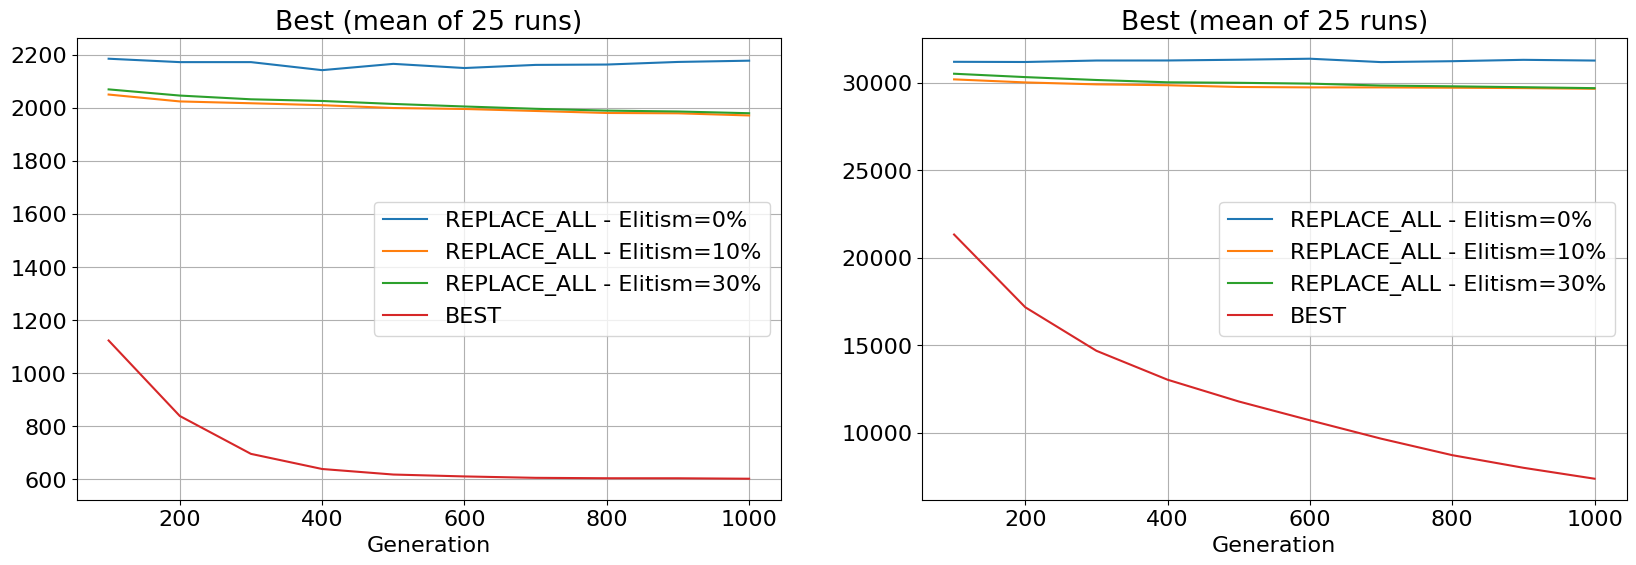

In [21]:
plot_big_and_small(
    generations, data_small_5, data_big_5, labels, n_runs=get_N_simulations()
)

Using `NextGenerationPolicy.BEST` turned out to be the best candidate overall for both small and big problems.

## Adaptive mutation probability

We now try to develop a more refined approach for the evolution of mutation probability, building again on the work in [6]. In this paragraph we impose the mutation probability for generation `i+2` to depend on how many chromosomes from generation `i+1` will effectively replace chromosomes from generation `i`. This approach is only compatible with `NextGenerationPolicy.BEST`. 

This way we hope to intercept generations in the run when the generational interchange is slow and to speed it up via an enforced mutation ratio.

In numbers, we use the following formula:
$$
m(i+2) = M \frac{\#\{c_h \in G(i+1) \land c_h \in G(i)\}}{\text{populationSize}}
$$
where $M \in [0,1]$ is a reference mutation probability.

In [38]:
ox1_config = replace(
    ox_rs_config, mutation_function_adaptive=True, mutation_probability=0.1
)
ox4_config = replace(
    ox_rs_config, mutation_function_adaptive=True, mutation_probability=0.4
)
ox10_config = replace(
    ox_rs_config, mutation_function_adaptive=True, mutation_probability=1
)

config = tuple((ox_rs_config, ox1_config, ox4_config, ox10_config))
labels = tuple(("Constant", "Adaptive (M=0.1)", "Adaptive (M=0.4)", "Adaptive (M=1.0)"))

In [23]:
data_small_6 = run_many_optimizations(problem_small, config)
data_big_6 = run_many_optimizations(problem_big, config)

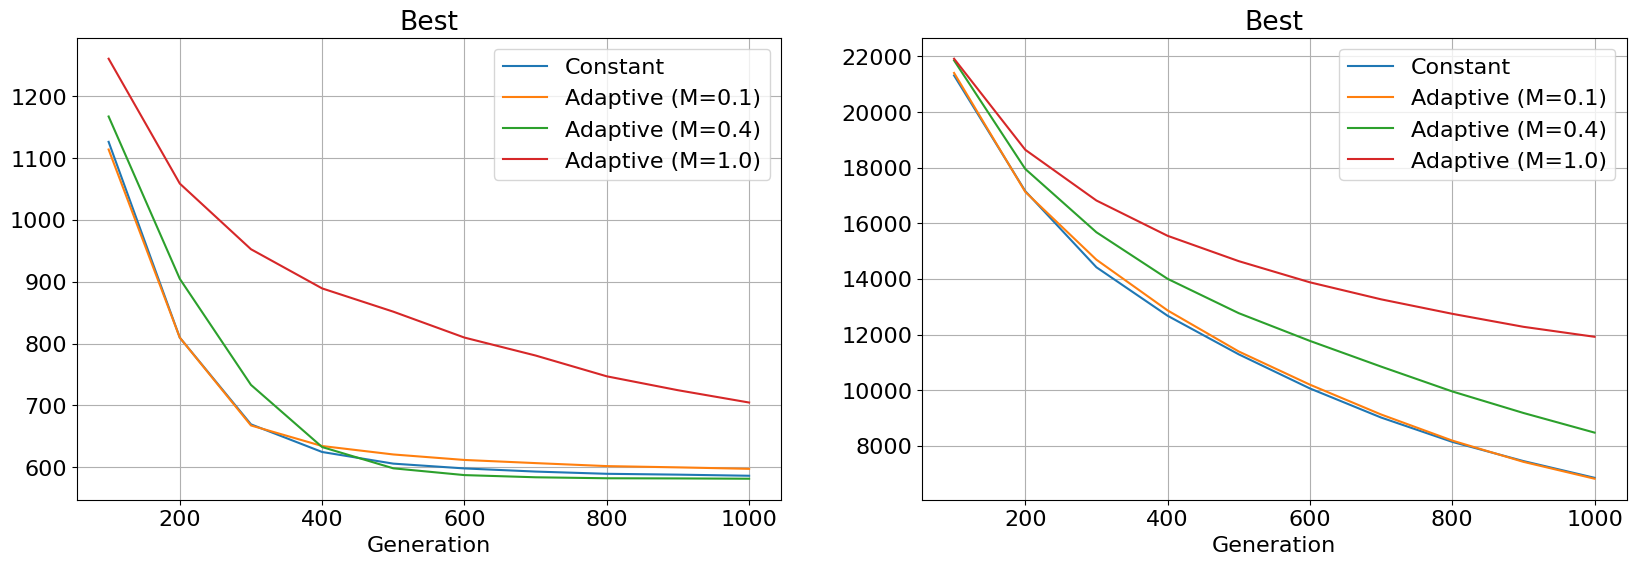

In [39]:
plot_big_and_small(generations, data_small_6, data_big_6, labels)

The adaptive approach looks to work quite bad when $M \to 1.0$, but for small values of $M$ it could be beneficial on the results depending on the situation. We also look at the evolution of the mutation probability to see what's happening throughout the run:

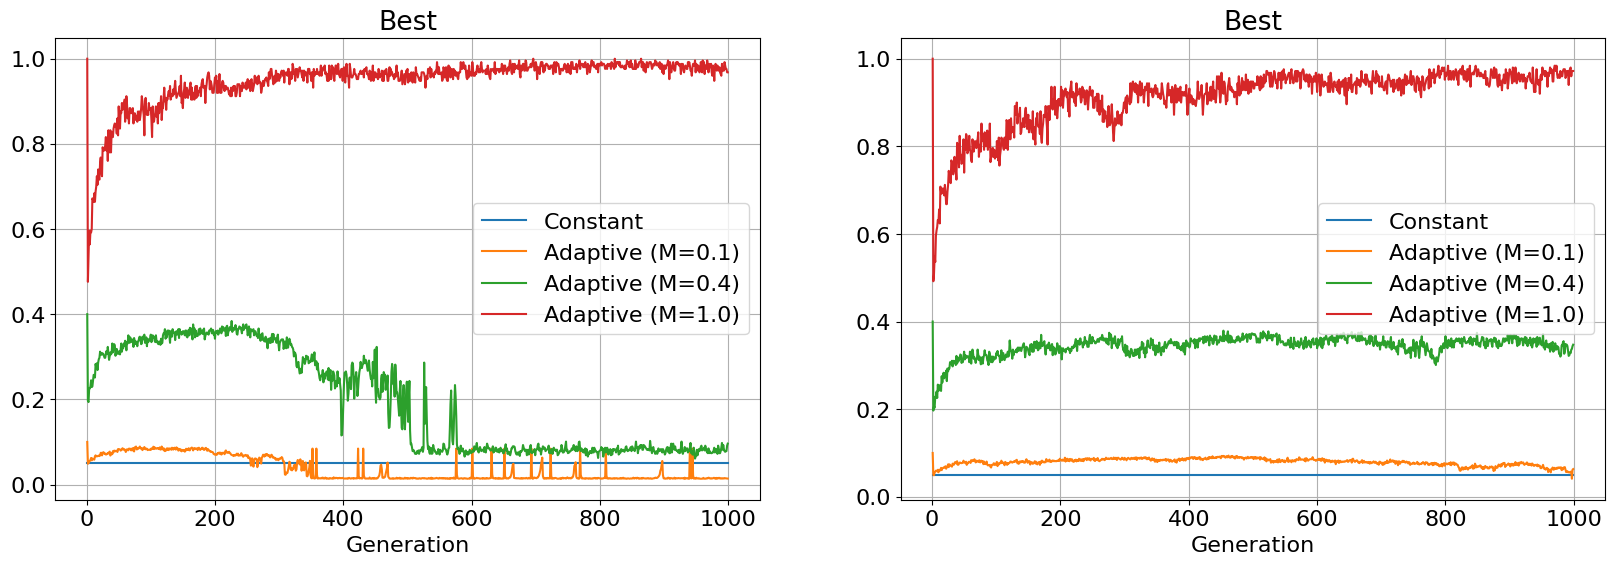

In [40]:
from operator import attrgetter

plot_big_and_small(
    generations_full,
    data_small_6,
    data_big_6,
    labels,
    data_operator=attrgetter("mutation_probability"),
)

It's interesting to see that the adaptive approach is allowed to approach the absence of any mutation for big problems, which produced slightly better results in the experiment where we selected the best mutation operator.

## Oscillating mutation probability

An other possible approach is to integrate an oscillating term. This idea comes from the observation that it's not always needed to mutate *a lot*, but the process could instead be periodic, thus leaving time to the population to settle and to leverage the newly introduced diversity with the last strong mutation wave. The oscillating term is computed with the following formula:
$$
m_{\text{osc}}(i) = A \sin\left(i\frac{n_{\text{cycles}}}{G} 2\pi\right)
$$

We perform several experiments with varying amplitudes and constant period ($n_{\text{cycles}} = 5$ full periods throughout the full run):

In [26]:
ox_osc0_config = replace(
    ox_rs_config,
    mutation_function_oscillating_amplitude=0.0,
    mutation_function_oscillating_cycles=5,
    mutation_probability=0.2,
)
ox_osc2_config = replace(ox_osc0_config, mutation_function_oscillating_amplitude=0.2)
ox_osc4_config = replace(ox_osc0_config, mutation_function_oscillating_amplitude=0.4)
ox_osc6_config = replace(ox_osc0_config, mutation_function_oscillating_amplitude=0.6)

config = tuple((ox_osc0_config, ox_osc2_config, ox_osc4_config, ox_osc6_config))
labels = tuple(("M=0.2, A=0", "M=0.2, A=0.2", "M=0.2, A=0.4", "M=0.2, A=0.6"))

In [27]:
data_small_7 = run_many_optimizations(problem_small, config)
data_big_7 = run_many_optimizations(problem_big, config)

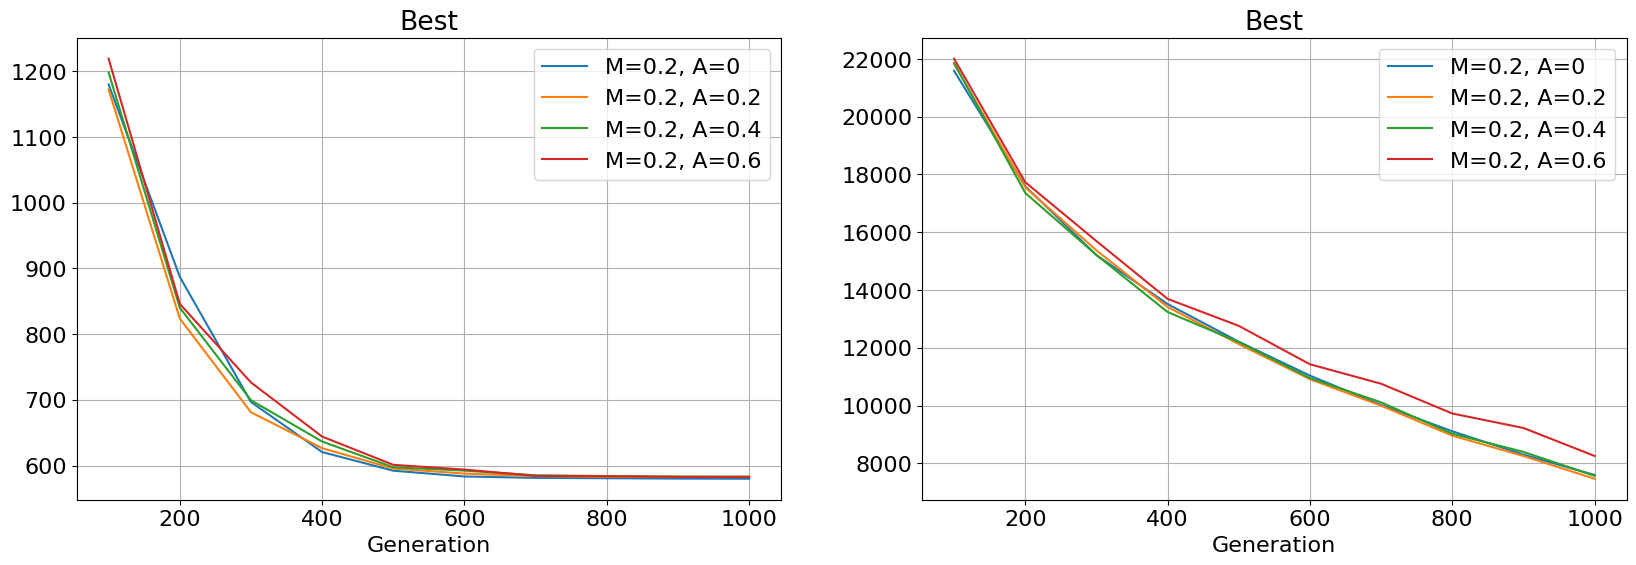

In [28]:
plot_big_and_small(generations, data_small_7, data_big_7, labels)

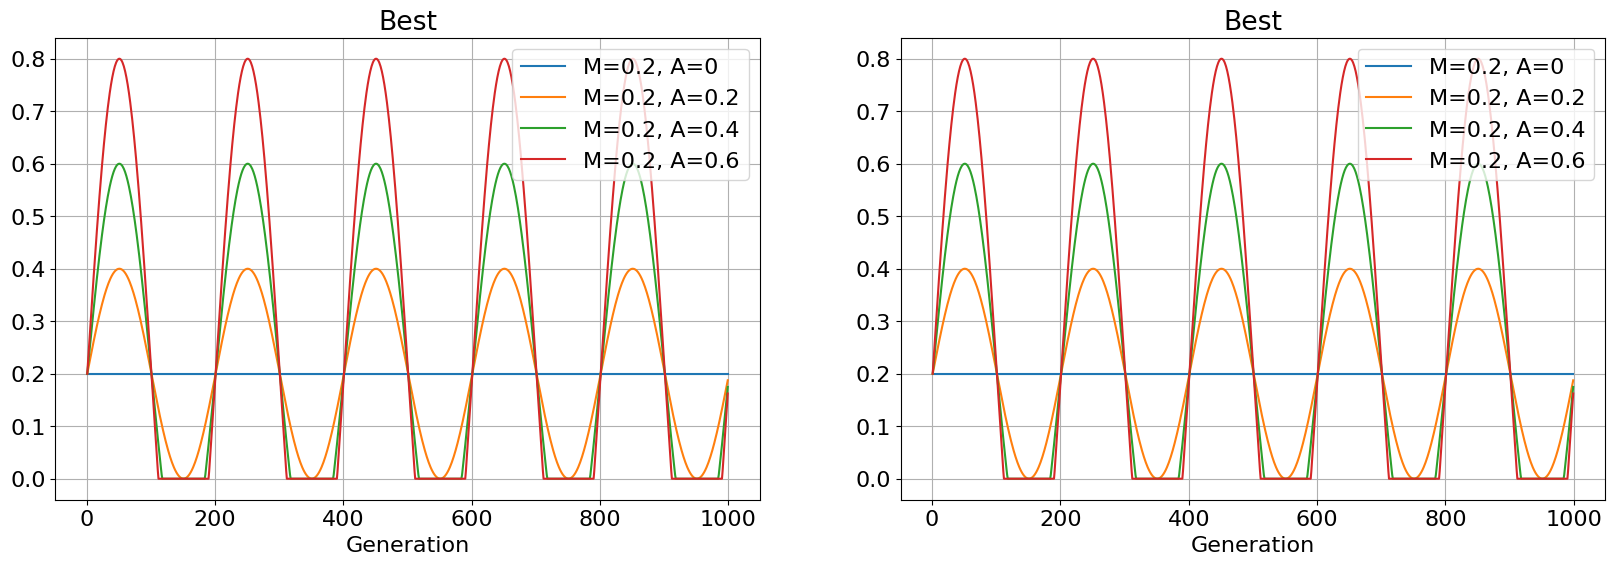

In [29]:
from operator import attrgetter

plot_big_and_small(
    generations_full,
    data_small_7,
    data_big_7,
    labels,
    data_operator=attrgetter("mutation_probability"),
)

It looks like this approach didn't pay back.

## Adaptive + periodic terms

We now try to merge the two approaches, thus keeping an oscillating term with constant amplitude and an additive adaptive term with the same approach presented a few paragraphs above.

In [30]:
ox_osc2_ad2_config = replace(
    ox_osc2_config, mutation_function_adaptive=True, mutation_probability=0.2
)
ox_osc2_ad4_config = replace(
    ox_osc2_config, mutation_function_adaptive=True, mutation_probability=0.4
)
ox_osc4_ad2_config = replace(
    ox_osc4_config, mutation_function_adaptive=True, mutation_probability=0.2
)
ox_osc4_ad4_config = replace(
    ox_osc4_config, mutation_function_adaptive=True, mutation_probability=0.4
)

config = tuple(
    (
        ox_config,
        ox_osc2_ad2_config,
        ox_osc2_ad4_config,
        ox_osc4_ad2_config,
        ox_osc4_ad4_config,
    )
)
labels = tuple(
    (
        "Constant",
        "Adaptive - M=0.2, A=0.2",
        "Adaptive - M=0.2, A=0.4",
        "Adaptive - M=0.4, A=0.2",
        "Adaptive - M=0.4, A=0.4",
    )
)

In [31]:
data_small_8 = run_many_optimizations(problem_small, config)
data_big_8 = run_many_optimizations(problem_big, config)

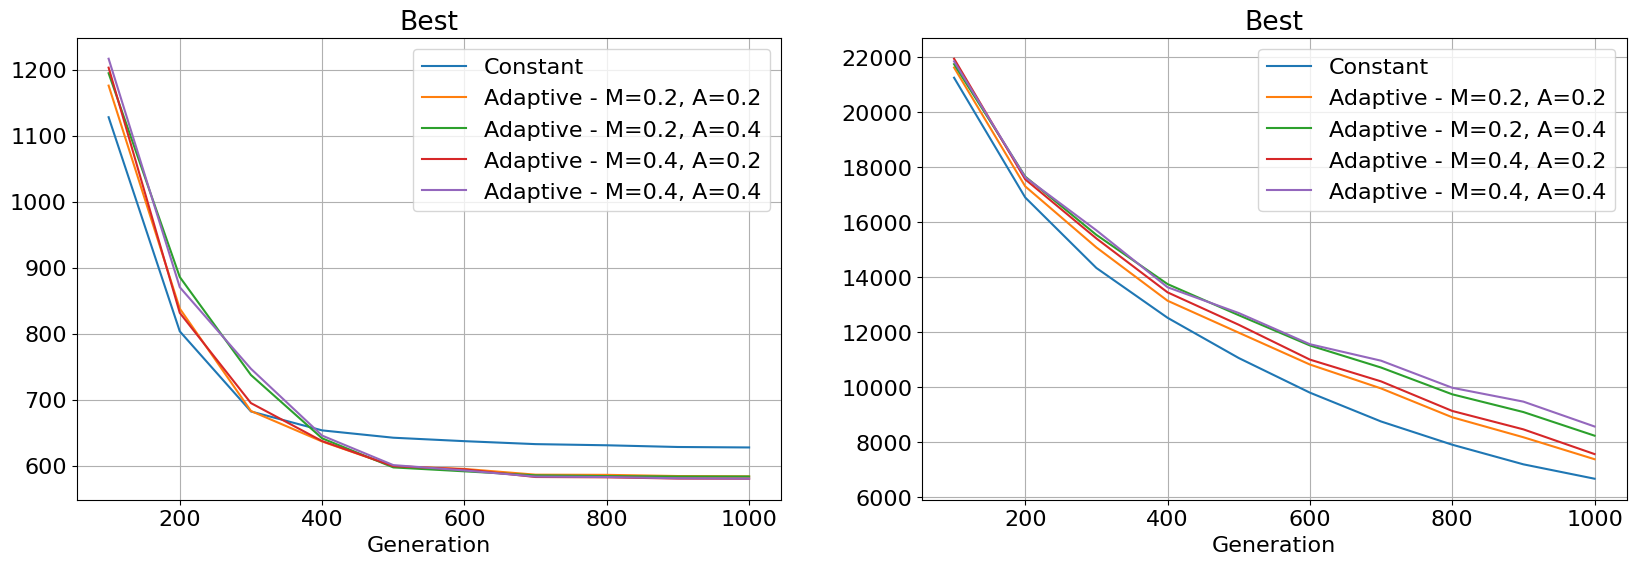

In [32]:
plot_big_and_small(generations, data_small_8, data_big_8, labels)

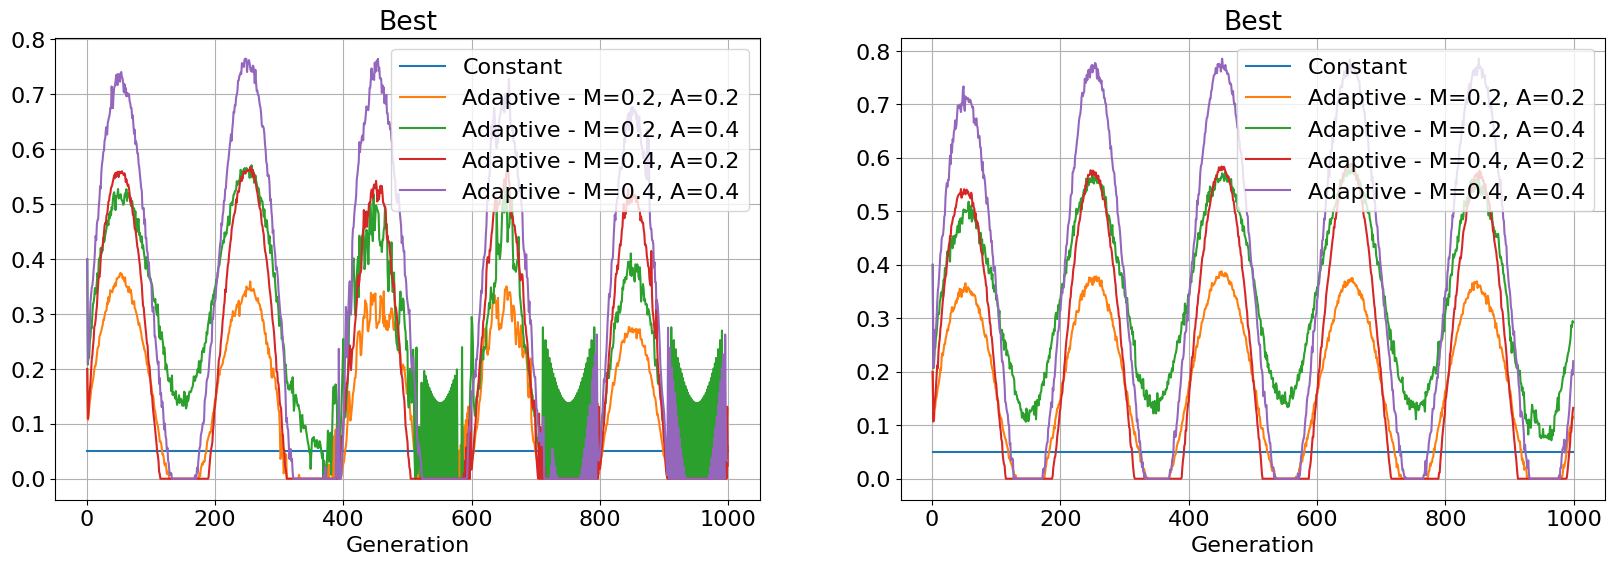

In [33]:
plot_big_and_small(
    generations_full,
    data_small_8,
    data_big_8,
    labels,
    data_operator=attrgetter("mutation_probability"),
)

Again, combining these two approaches does not seem to deliver an optimal run.

# Other topics

## Implementation of `CX2`

The MATLAB code in [3] proposed as the official implementation of `CX2` is clearly inefficient due to the frequent restort to the `find()` function, which is $\Theta(N)$. Since the crossover requires a linear scan of the array, the implementation in [3] is $\Theta(N^2)$.

For this reason we re-implemented it by leveraging a pre-built index, which makes the function $\Theta(N)$.

Output()

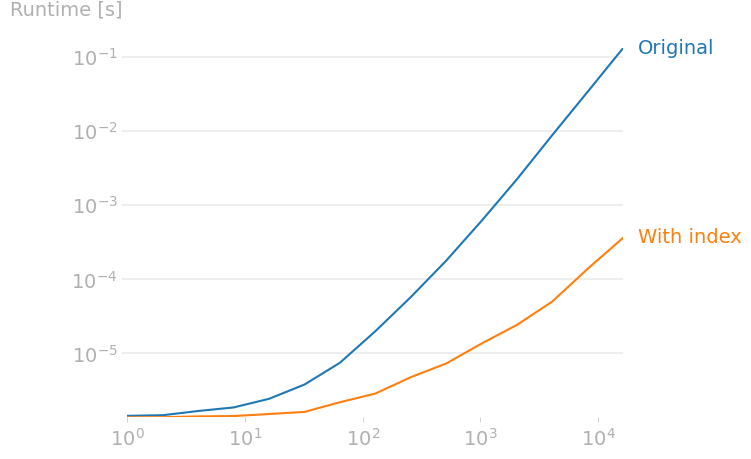

In [34]:
from tsp_genetic import cx2, cx2_original
import perfplot

perfplot.show(
    setup=lambda n: ((np.random.permutation(n) + 1, np.random.permutation(n) + 1),),
    kernels=[
        lambda a: cx2_original(*a),
        lambda a: cx2(*a),
    ],
    labels=["Original", "With index"],
    n_range=[2**k for k in range(15)],
    show_progress=False,
)

setup_matplotlib()

# Conclusion

## Unexplored directions

It could be interesting to take into account various ways to generate the initial generation of chromosomes. In this project we've only considered the randomized permutation of the list of cities, but more refined approaches exist to guarantee a better coverage on the solution manifold.

## References

1. Deep, Kusum, and Hadush Mebrahtu. "New variations of order crossover for travelling salesman problem." International Journal of Combinatorial Optimization Problems and Informatics 2.1 (2011): 2-13.
1. Potvin, Jean-Yves. "Genetic algorithms for the traveling salesman problem." Annals of Operations Research 63 (1996): 337-370.
1. Hussain, Abid, et al. "Genetic algorithm for traveling salesman problem with modified cycle crossover operator." Computational intelligence and neuroscience 2017 (2017).
1. Kumar, Rakesh, Girdhar Gopal, and Rajesh Kumar. "Novel crossover operator for genetic algorithm for permutation problems." International Journal of Soft Computing and Engineering (IJSCE) 3.2 (2013): 252-258.
1. Abdoun, Otman, Jaafar Abouchabaka, and Chakir Tajani. "Analyzing the performance of mutation operators to solve the travelling salesman problem." arXiv preprint arXiv:1203.3099 (2012).
1. Hassanat, Ahmad, et al. "Choosing mutation and crossover ratios for genetic algorithms—a review with a new dynamic approach." Information 10.12 (2019): 390.
1. f2py official documentation: https://numpy.org/doc/stable/f2py/
1. Goldberg, David E., and Robert Lingle. "Alleles, loci, and the traveling salesman problem." Proceedings of the first international conference on genetic algorithms and their applications. Psychology Press, 2014.
1. Davis, Lawrence. "Applying adaptive algorithms to epistatic domains." IJCAI. Vol. 85. 1985.

## Open source software

- argparse: https://docs.python.org/3/library/argparse.html
- f2py: https://numpy.org/doc/stable/f2py/
- Matplotlib: https://matplotlib.org
- NumPy: https://numpy.org
- Python standard library: https://docs.python.org/3/library/
- pytest: https://pytest.org
- perfplot: https://github.com/nschloe/perfplot

## Data

- TSPLIB: http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/